## 窗函数

![](images/2025-03-16-15-13-43.png)

### 参考资料

- [雷达信号处理中的加窗问题](https://blog.csdn.net/xhblair/article/details/130626666?spm=1001.2014.3001.5502)
  
- [理解FFT和信号加窗原理及意义 - 全文](https://www.elecfans.com/emb/fpga/20171116580796_a.html)

---

### 什么是窗函数

在信号处理领域，**窗函数**主要用于减少频谱分析过程中的“频谱泄漏（Spectral Leakage）”现象。理想情况下，对无限长的周期性信号进行傅立叶变换，可以准确获取其频谱。然而，在实际应用场景里，只能截取有限长度的信号进行离散傅立叶变换（如FFT）。当截取一段长度为 N的数据进行变换时，相当于与一个长度为N的“矩形窗”相乘；若信号本身并非周期性或采样截止点处信号不连续，频谱的能量会扩散到附近的频率上，即出现频谱泄漏。

窗函数的本质就是在时间域对信号进行加权，让截取到的局部信号看起来相对“平滑”，以期减少高频处的能量扩散。最常见的矩形窗（Rectangular Window）虽然很简单，但频谱旁瓣比较大；而如汉宁窗（Hanning Window）、汉明窗（Hamming Window）、布莱克曼窗（Blackman Window）等，通过平滑过渡来降低旁瓣，使得测试信号在频域分析中更接近理想情况。

简而言之，窗函数在信号两端逐渐收敛至零，从而在离散傅立叶变换中获得更好的频谱特性。不同窗函数的选择，一般需要根据实际的信号与分析需求，在主瓣宽度、旁瓣衰减与运算复杂度之间作平衡和取舍.

### 常见窗函数

1. 矩形窗
- 最简单的窗函数
- 适用于整周期采样场景
- 特点：频率分辨率最高，但旁瓣衰减最差

矩形窗上各点均是1，也就是不加窗。

$$ w(n) = 1,  n $$


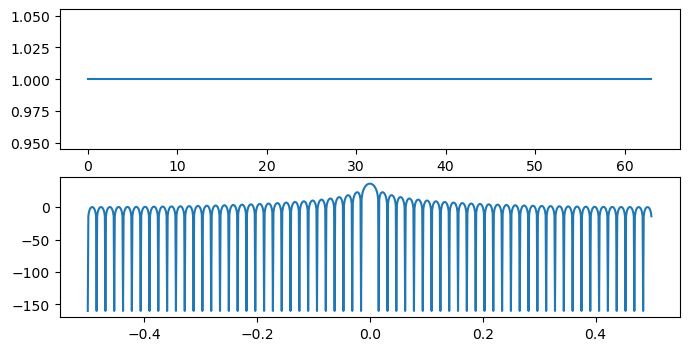

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 设置窗口长度
N = 64
w_ = np.ones(N)
w_freq = np.fft.fftshift(np.fft.fft(w_, 1024))
freq = np.linspace(-0.5, 0.5, 1024, endpoint=False)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(w_)
plt.subplot(212)
plt.plot(freq, 20*np.log10(np.abs(w_freq)+ 1e-8))


2. 汉宁窗
- 最常用的窗函数之一
- 适用于随机信号分析
- 特点：频率分辨率和旁瓣衰减较为平衡


$$
w(n) = 0.5 \bigl(1 - \cos\bigl(\frac{2 \pi n}{N - 1}\bigr)\bigr), \quad n \in [0, N - 1]
$$






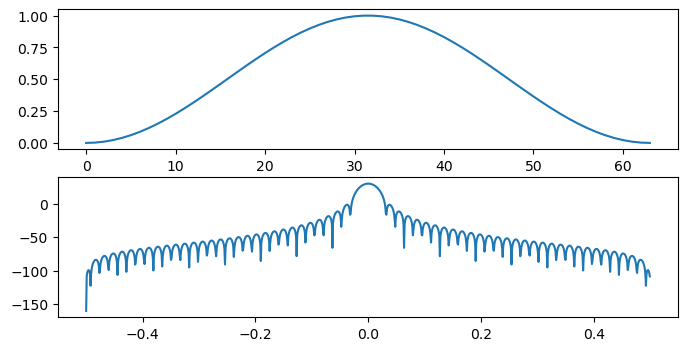

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 设置窗口长度
N = 64
w_ = np.hanning(N)
w_freq = np.fft.fftshift(np.fft.fft(w_, 1024))
freq = np.linspace(-0.5, 0.5, 1024, endpoint=False)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(w_)
plt.subplot(212)
plt.plot(freq, 20*np.log10(np.abs(w_freq)+ 1e-8))

3. 汉明窗
- 汉宁窗的改进版本
- 特点：相比汉宁窗有更好的旁瓣衰减


    标准的汉明窗通常写作：

    $$
    w(n) = 0.54 - 0.46 \cos\!\Bigl(\frac{2\pi n}{N - 1}\Bigr), 
    \quad 0 \le n \le N - 1
    $$

其中，  
- \( n \) 表示时域采样点的索引  
- \( N \) 为窗函数长度（采样点数）  
- 0.54 与 0.46 对应经典的汉明窗系数  



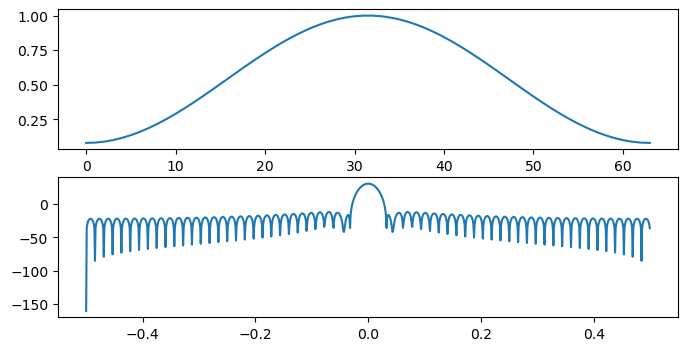

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 设置窗口长度
N = 64
w_ = np.hamming(N)
w_freq = np.fft.fftshift(np.fft.fft(w_, 1024))
freq = np.linspace(-0.5, 0.5, 1024, endpoint=False)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(w_)
plt.subplot(212)
plt.plot(freq, 20*np.log10(np.abs(w_freq)+ 1e-8))


4. 布莱克曼窗
- 具有较好的旁瓣衰减
- 特点：主瓣较宽，频率分辨率较低


以下为 Blackman-Harris 窗函数在时域的定义：

$$
w(n)
= 0.35875 \;-\; 0.48829 \cos\!\Bigl(\tfrac{2\pi n}{N-1}\Bigr)
\;+\; 0.14128 \cos\!\Bigl(\tfrac{4\pi n}{N-1}\Bigr)
\;-\; 0.01168 \cos\!\Bigl(\tfrac{6\pi n}{N-1}\Bigr),
\quad 0 \le n \le N - 1
$$


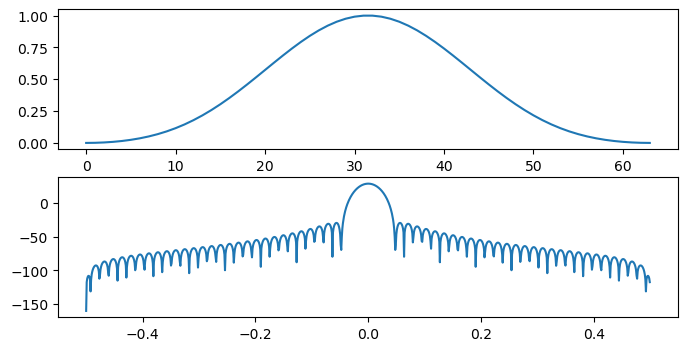

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 设置窗口长度
N = 64
w_ = np.blackman(N)
w_freq = np.fft.fftshift(np.fft.fft(w_, 1024))
freq = np.linspace(-0.5, 0.5, 1024, endpoint=False)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(w_)
plt.subplot(212)
plt.plot(freq, 20*np.log10(np.abs(w_freq)+ 1e-8))

## 窗函数的时域与频域

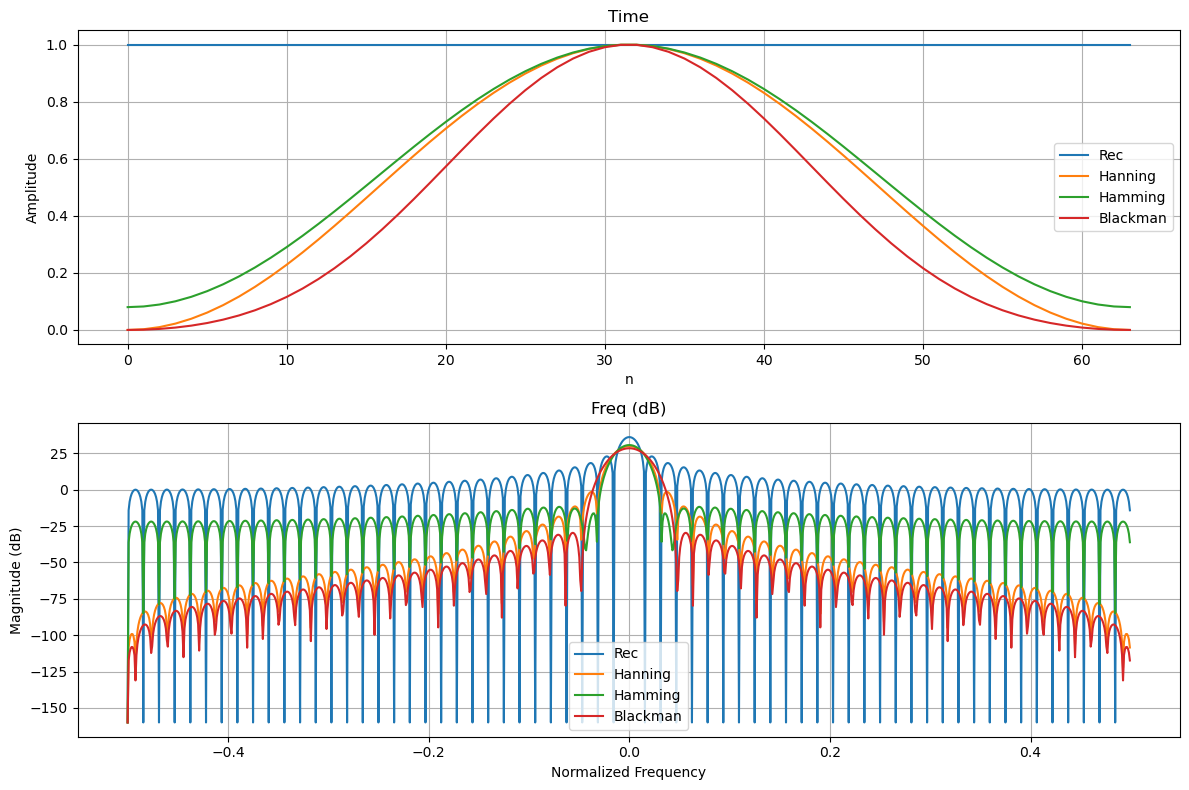

In [43]:

import numpy as np
import matplotlib.pyplot as plt

# 设置窗口长度
N = 64

# 定义常见窗函数
windows = {
    "Rec": np.ones(N),
    "Hanning":  np.hanning(N),
    "Hamming":  np.hamming(N),
    "Blackman": np.blackman(N),
}

# 为了更好观察频域特征，这里设置零填充
fft_len = 1024  

# 创建绘图窗口
fig, (ax_time, ax_freq) = plt.subplots(2, 1, figsize=(12, 8))

# 画时域曲线
for name, w in windows.items():
    ax_time.plot(w, label=name)

ax_time.set_title("Time")
ax_time.set_xlabel("n")
ax_time.set_ylabel("Amplitude")
ax_time.legend()
ax_time.grid(True)

# 画频域曲线
for name, w in windows.items():
    # 进行 FFT 及频率轴转换
    W = np.fft.fft(w, n=fft_len)
    W = np.fft.fftshift(W)
    freq = np.linspace(-0.5, 0.5, fft_len, endpoint=False)
    
    # 幅度转 dB
    W_magnitude_db = 20 * np.log10(np.abs(W) + 1e-8)
    ax_freq.plot(freq, W_magnitude_db, label=name)

ax_freq.set_title("Freq (dB)")
ax_freq.set_xlabel("Normalized Frequency")
ax_freq.set_ylabel("Magnitude (dB)")
ax_freq.legend()
ax_freq.grid(True)

plt.tight_layout()
plt.show()

### 窗函数小结

- 如果截断的信号仍为周期信号，则不存在泄漏，无须加窗，相当于加矩形窗。

- 如果信号是随机信号或者未知信号，或者有多个频率分量，测试关注的是频率点而非能量大小，建议选择汉宁窗。

- 对于校准目的，则要求幅值精确，平顶窗是个不错的选择。

- 如果同时要求幅值精度和频率精度，可选择凯塞窗。

- 如果检测两个频率相近、幅值不同的信号，建议用布莱克曼窗。

- 锤击法试验力信号加力窗，响应可加指数窗。

### 信号处理与窗函数

下面举例说明各类窗函数对同一信号的处理结果差异。

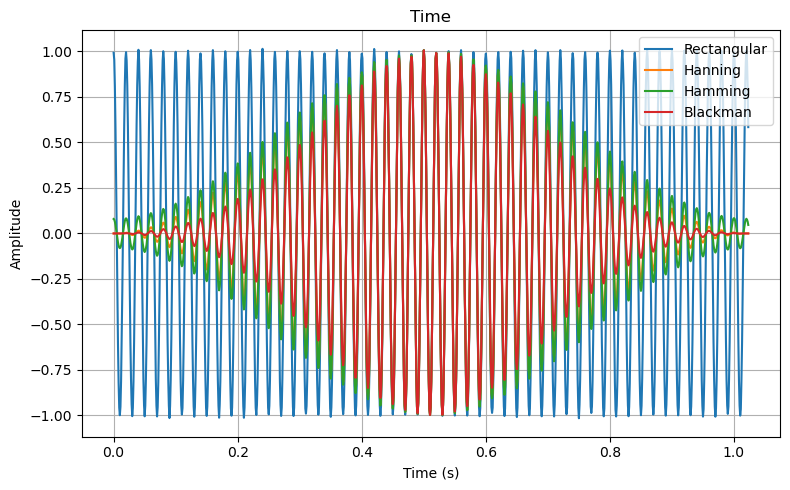

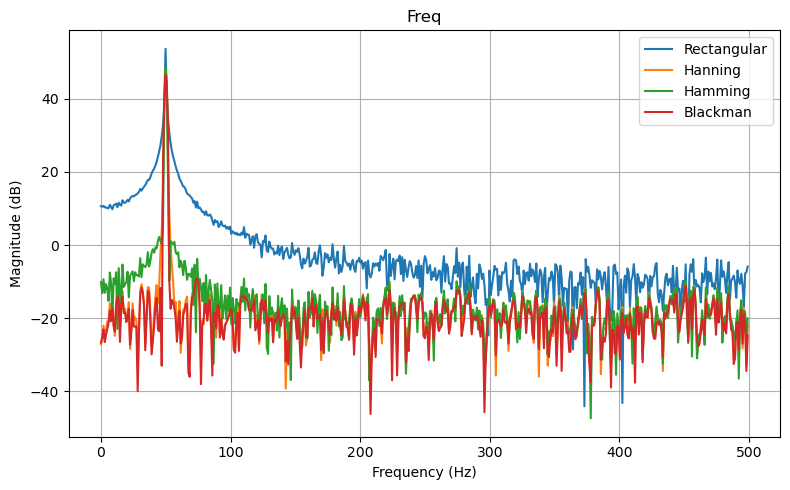

In [48]:
import numpy as np  
import matplotlib.pyplot as plt  

# ------------------------------  
# 1. 生成含噪声的余弦信号  
# ------------------------------  
fs = 1000          # 采样频率  
N = 1024           # 信号长度  
t = np.arange(N) / fs  

f = 50             # 目标信号频率  
A = 1.0            # 信号幅度  
pure_tone = A * np.cos(2 * np.pi * f * t)  

# 计算满足SNR=40dB的噪声方差  
SNR_dB = 40  
SNR_linear = 10**(SNR_dB / 10)  
signal_power = (A**2) / 2.0  # 余弦信号的平均功率(峰值^2/2)  
noise_power = signal_power / SNR_linear  
noise_std = np.sqrt(noise_power)  

# 产生高斯白噪声并叠加到信号上  
noise = noise_std * np.random.randn(N)  
noisy_signal = pure_tone + noise  

# ------------------------------  
# 2. 定义不同窗函数  
# ------------------------------  
window_functions = {  
    "Rectangular": np.ones(N),  
    "Hanning": np.hanning(N),  
    "Hamming": np.hamming(N),  
    "Blackman": np.blackman(N),  
}  

# ------------------------------  
# 3. 绘制加窗后信号的时域对比（同一图层）  
# ------------------------------  
plt.figure(figsize=(8, 5))  
for win_name, win in window_functions.items():  
    signal_win = noisy_signal * win  
    plt.plot(t, signal_win, label=win_name)  # 叠加至同一图层  

plt.title("Time")  
plt.xlabel("Time (s)")  
plt.ylabel("Amplitude")  
plt.legend()  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

# ------------------------------  
# 4. 绘制加窗后频域（FFT）对比（同一图层）  
# ------------------------------  
plt.figure(figsize=(8, 5))  
half_index = N // 2  
freq_axis = np.fft.fftfreq(N, d=1/fs)[:half_index]  # 仅取前半部分频率  
for win_name, win in window_functions.items():  
    # 加窗后时域信号  
    signal_win = noisy_signal * win  
    # 频域变换  
    fft_data = np.fft.fft(signal_win)  
    # 幅度值(dB)  
    mag_spectrum = 20 * np.log10(np.abs(fft_data[:half_index]))  
    
    plt.plot(freq_axis, mag_spectrum, label=win_name)  

plt.title("Freq")  
plt.xlabel("Frequency (Hz)")  
plt.ylabel("Magnitude (dB)")  
plt.legend()  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

从图中可以看出，不同窗函数在时域和频域上呈现出以下差异和作用：

1. **矩形窗（Rectangular）**  
   - 时域：直接截断信号，没有过渡衰减。  
   - 频域：主瓣较窄，但旁瓣衰减不足（旁瓣能量较高），容易造成泄漏。适合周期性信号，但对非周期信号的频谱估计误差更大。

2. **汉宁窗（Hanning）**  
   - 时域：两端平滑过渡，减小了最边缘处的信号突变。  
   - 频域：主瓣比矩形稍宽，但旁瓣衰减优于矩形窗，降低了频谱泄漏。适合多频率成分或随机信号测量，是常用的折衷选择。

3. **汉明窗（Hamming）**  
   - 时域：与汉宁窗类似，但边缘衰减更为柔和。  
   - 频域：主瓣略宽于汉宁窗，旁瓣衰减也很显著。汉明窗对幅度失真与频谱泄漏有相对平衡的表现，被广泛使用。

4. **布莱克曼窗（Blackman）**  
   - 时域：边缘过渡更平滑，整体形状在两端衰减更明显。  
   - 频域：主瓣最宽，但旁瓣衰减效果最好，抑制泄漏的能力强；适合分辨幅值相差较大且需要精确捕捉的高动态范围信号。  

总的来说，矩形窗主瓣窄但旁瓣高；其它窗（如汉宁、汉明、黑曼）逐步扩大主瓣来换取更低的旁瓣，减少泄漏和干扰。选择何种窗函数，主要取决于对频率分辨率与旁瓣抑制（泄漏）要求的权衡。

### 两个频率相近信号分析

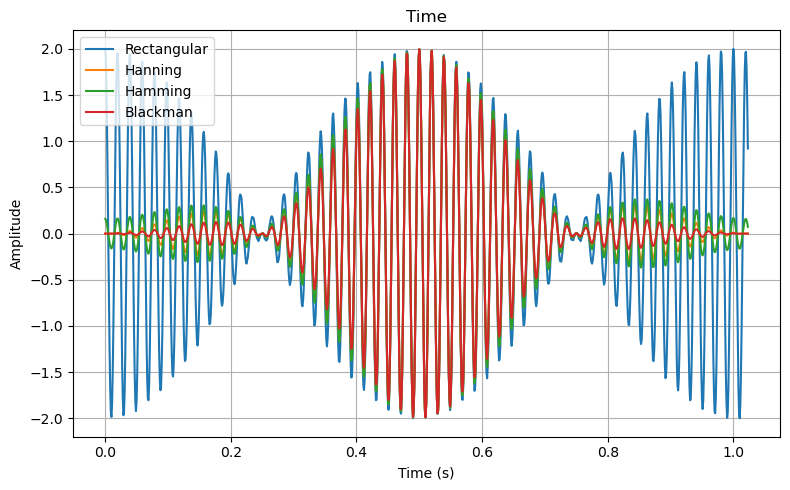

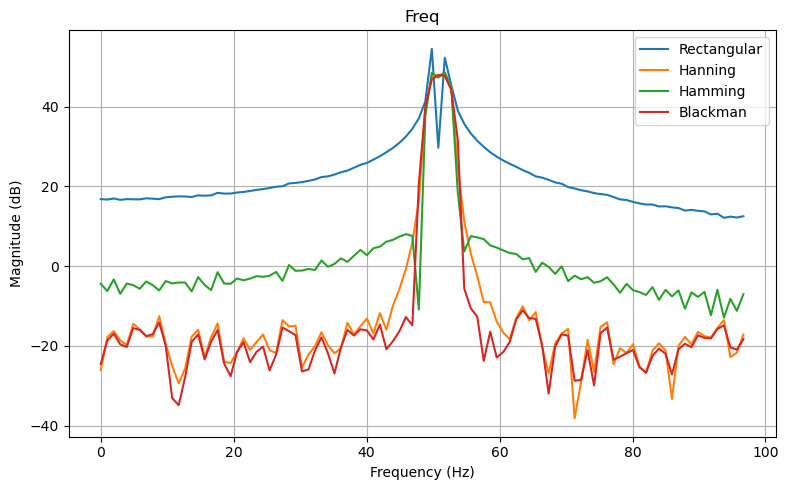

In [60]:
import numpy as np  
import matplotlib.pyplot as plt  

# ------------------------------  
# 1. 生成含噪声的两个相近频率余弦信号  
# ------------------------------  
fs = 1000    # 采样频率  
N = 1024     # 信号长度  
t = np.arange(N) / fs  

# 相近频率设置  
f1 = 50.0  
f2 = 52.0  
A = 1.0  

sig1 = A * np.cos(2 * np.pi * f1 * t)  
sig2 = A * np.cos(2 * np.pi * f2 * t)  
pure_signal = sig1 + sig2  

# 计算满足SNR=40dB的噪声方差  
SNR_dB = 40  
SNR_linear = 10**(SNR_dB / 10)  
signal_power = (A**2) / 2.0  # 余弦信号的平均功率(峰值^2/2)  
noise_power = signal_power / SNR_linear  
noise_std = np.sqrt(noise_power)  

# 产生高斯白噪声并叠加到信号上  
noise = noise_std * np.random.randn(N)  
noisy_signal = pure_tone + noise  

# ------------------------------  
# 2. 定义不同窗函数  
# ------------------------------  
window_functions = {  
    "Rectangular": np.ones(N),  
    "Hanning": np.hanning(N),  
    "Hamming": np.hamming(N),  
    "Blackman": np.blackman(N),  
}  

# ------------------------------  
# 3. 绘制加窗后信号的时域对比（同一图层）  
# ------------------------------  
plt.figure(figsize=(8, 5))  
for win_name, win in window_functions.items():  
    signal_win = noisy_signal * win  
    plt.plot(t, signal_win, label=win_name)  # 叠加至同一图层  

plt.title("Time")  
plt.xlabel("Time (s)")  
plt.ylabel("Amplitude")  
plt.legend()  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

# ------------------------------  
# 4. 绘制加窗后频域（FFT）对比（同一图层）  
# ------------------------------  
plt.figure(figsize=(8, 5))  
half_index = N // 2  
freq_axis = np.fft.fftfreq(N, d=1/fs)[:half_index]  # 仅取前半部分频率  
for win_name, win in window_functions.items():  
    # 加窗后时域信号  
    signal_win = noisy_signal * win  
    # 频域变换  
    fft_data = np.fft.fft(signal_win)  
    # 幅度值(dB)  
    mag_spectrum = 20 * np.log10(np.abs(fft_data[:half_index]))  
    
    # 放大局部特征
    plt.plot(freq_axis[0:100], mag_spectrum[0:100], label=win_name)  

plt.title("Freq")  
plt.xlabel("Frequency (Hz)")  
plt.ylabel("Magnitude (dB)")  
plt.legend()  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

### 加窗对能量谱的影响

加窗可以给我们带来降低频谱泄露的好处，但同时是也会带来不好的影响(加窗这件事的成本不仅仅是增加了计算步骤和计算量)：`频谱幅值失真`

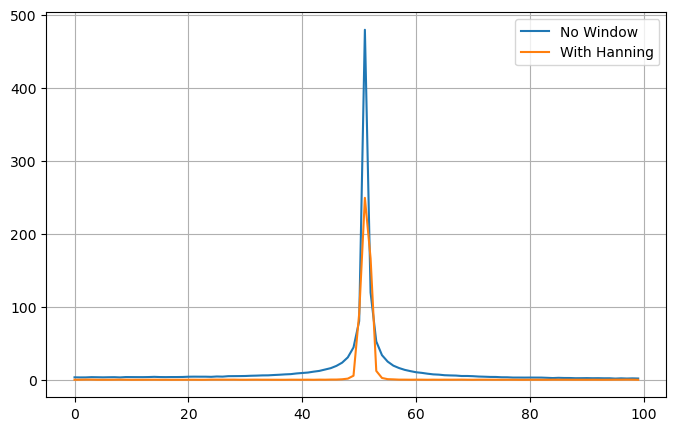

In [68]:
import numpy as np  
import matplotlib.pyplot as plt  

# ------------------------------  
# 1. 生成含噪声的余弦信号  
# ------------------------------  
fs = 1000          # 采样频率  
N = 1024           # 信号长度  
t = np.arange(N) / fs  

f = 50             # 目标信号频率  
A = 1.0            # 信号幅度  
pure_tone = A * np.cos(2 * np.pi * f * t)  

# 计算满足SNR=40dB的噪声方差  
SNR_dB = 40  
SNR_linear = 10**(SNR_dB / 10)  
signal_power = (A**2) / 2.0  # 余弦信号的平均功率(峰值^2/2)  
noise_power = signal_power / SNR_linear  
noise_std = np.sqrt(noise_power)  

# 产生高斯白噪声并叠加到信号上  
noise = noise_std * np.random.randn(N)  
noisy_signal = pure_tone + noise  

# ------------------------------  
# 2. 定义窗函数  
# ------------------------------  
w_ = np.hanning(N)
noisy_signal_win = noisy_signal * w_

plt.figure(figsize=(8, 5))  
plt.plot(np.abs(np.fft.fft(noisy_signal))[0:100], label="No Window")
plt.plot(np.abs(np.fft.fft(noisy_signal_win))[0:100], label="With Hanning")
plt.legend()
plt.grid()

加窗后频谱幅值失真这一问题的解决：如何复原频谱幅值的真实值？

![](images/2025-03-16-16-09-32.png)

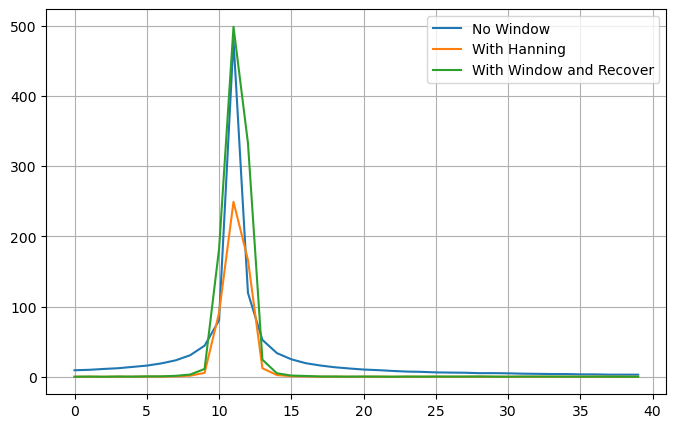

In [73]:
plt.figure(figsize=(8, 5))  
plt.plot(np.abs(np.fft.fft(noisy_signal))[40:80], label="No Window")
plt.plot(np.abs(np.fft.fft(noisy_signal_win))[40:80], label="With Hanning")
plt.plot(np.abs(np.fft.fft(noisy_signal_win))[40:80]*2, label="With Window and Recover")
plt.legend()
plt.grid()